# Assignment

For this assignment, you are going to apply statistical inference on [Titanic dataset](https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv).


Try to answer the following questions. Include a hypothesis and the test assumptions. **If the assumptions are valid**, try to conduct the t-test and addditionally calculate manually the 95% confidence interval which is derived from the hypothesis that you try to evaluate. Also try to come up with some valid findings from the data.



1. Is it true that the younger a passenger was, they had more chance of survival? Is this difference statistically important? 
2. Is there a correlation between fare price and survival? Again, is this difference statistically important?

As you are conducting the analysis, consider what other variables may be accounting for any significant differences you find. 

##### More specifically, the tasks that you need to enounter in your deliverables are:

1. Familiarize yourself with the dataset. Review the structure of it and focus on the fields necessary to answer the above mentioned questions.

2. State the null and the alternative hypotheses that address the questions.

3. Manipulate the dataset accordingly in order to prepare it for the statistical tests.

4. Perform an exploratory analysis with summary statistics and corresponding visualizations, in order to gain a clearer view about the distributions of the samples. Focus on their differences.

5. Perform the necessary normality checks in order to make sure that you can conduct the statistical tests.

6. Apply t-test statistic if you pass successfully the normality checks

7. For this exercise, you will also need to write a function to calculate the confidence interval using the standard error for comparing two means (used in t-statistic):

$$
    \bar{X_1} - \bar{X_2} \pm z*\sqrt{\dfrac{s_1^2}{n_1} + \dfrac{s_2^2}{n_2}}
$$

- $z$ is the critical value
- $s_1$ sample 1 standard deviation
- $s_2$ sample 2 standard deviation

- Let $z=1.96$ for a 95% confidence level

- Use the following method signature:

    `def get_95_ci(data1, data2)`
    

8. Elaborate on the results of your analyses.

**1. Age vs Survival**

In [131]:
import math 
import pandas as pd 
import numpy as np 
from scipy import stats 
import matplotlib.pyplot as plt

titanic = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv")
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [138]:
titanic_new = titanic.dropna()
surv = titanic_new.loc[titanic['Survived'] == 1]
death = titanic_new.loc[titanic['Survived'] == 0]


DescribeResult(nobs=123, minmax=(0.92, 80.0), mean=32.905853658536586, variance=221.71546053578567, skewness=0.11036517600265433, kurtosis=0.031225201077919262)
DescribeResult(nobs=60, minmax=(2.0, 71.0), mean=41.35, variance=247.73135593220334, skewness=-0.30756108127889464, kurtosis=-0.2764299013556979)


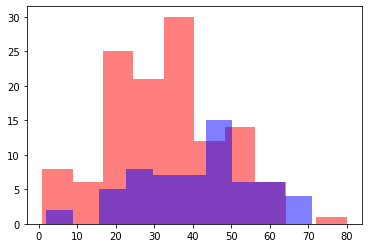

In [150]:
plt.hist(surv['Age'], alpha = .5,color='r')
plt.hist(death['Age'], alpha = .5,color='b')
print(stats.describe(surv['Age']))
print(stats.describe(death['Age']))

In [142]:
stats.ttest_ind(surv['Age'], death['Age'])

Ttest_indResult(statistic=-3.53435125095576, pvalue=0.0005189503307881672)

H0: Age and survivability is unrelated

Ha: Age affects survivability

Both graphs have skewness and kurtosis within the normal distribution range. 

The t-test has a small enough p value and thus we choose the alternative hypothesis. Age does affect survivability

**2. Fare vs Survival**

DescribeResult(nobs=123, minmax=(8.05, 512.3292), mean=85.82110650406504, variance=6698.362025553565, skewness=2.7788223952302076, kurtosis=10.470208979497217)
DescribeResult(nobs=60, minmax=(0.0, 263.0), mean=64.04826166666666, variance=3806.0826273061334, skewness=1.8178850690104182, kurtosis=3.0369847427015557)


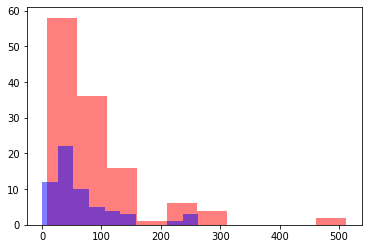

In [151]:
plt.hist(surv['Fare'], alpha = .5,color='r')
plt.hist(death['Fare'], alpha = .5,color='b')
print(stats.describe(surv['Fare']))
print(stats.describe(death['Fare']))

The kurtosis and skewness are both too high for the data to be considered normally distributed and thus a t-test cannot be used in this scenario.

In [162]:
def get_95_ci(data1, data2):
  avg1 = data1.mean()
  avg2 = data2.mean()
  var1 = (np.std(data1)) **2
  var2 = (np.std(data2)) **2
  upper = avg1 - avg2 + 1.96 * (var1/len(data1) + var2/len(data2)) **(1/2)
  lower = avg1 - avg2 - 1.96 * (var1/len(data1) + var2/len(data2)) **(1/2)
  print("Upper CI: " + str(upper))
  print("Lower CI: " + str(lower))

get_95_ci(surv['Age'],death['Age'])
get_95_ci(surv['Fare'],death['Fare'])

Upper CI: -3.7043689147255696
Lower CI: -13.18392376820126
Upper CI: 42.9184148468208
Lower CI: 0.6272748279759028


1. We are 95% confident that on average, the age difference between people who died and survived is between 3.7 to 13.2 years.

2. We are 95% confident that on average, the fare price difference between people who died and survived is between 0.6 to 42.9 dollars